# **Bank Customer Churn Model**

## **Objective**
1.

## **Data Source**
"https://www.kaggle.com/datasets/hj5992/bank-churn-modelling"

## **Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Import Data**

In [ ]:
churn_df = pd.read_csv('/content/drive/MyDrive/Machine Learning projects/Churn_Modelling.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Describe Data**

In [ ]:
# check info of the data
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# describe the data
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# shape of the data
churn_df.shape

(10000, 14)

In [ ]:
# Check value counts
for i, col in enumerate(churn_df[['NumOfProducts','HasCrCard','IsActiveMember','Exited', 'Geography','Gender','Tenure']]):
  print(f'The value count in {col}:')
  print(churn_df[col].value_counts())
  print()

The value count in NumOfProducts:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

The value count in HasCrCard:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64

The value count in IsActiveMember:
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

The value count in Exited:
Exited
0    7963
1    2037
Name: count, dtype: int64

The value count in Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

The value count in Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64

The value count in Tenure:
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64



In [ ]:
# drop unwanted columns
churn_df.drop(columns=['RowNumber','Surname'], inplace=True)

In [ ]:
churn_df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


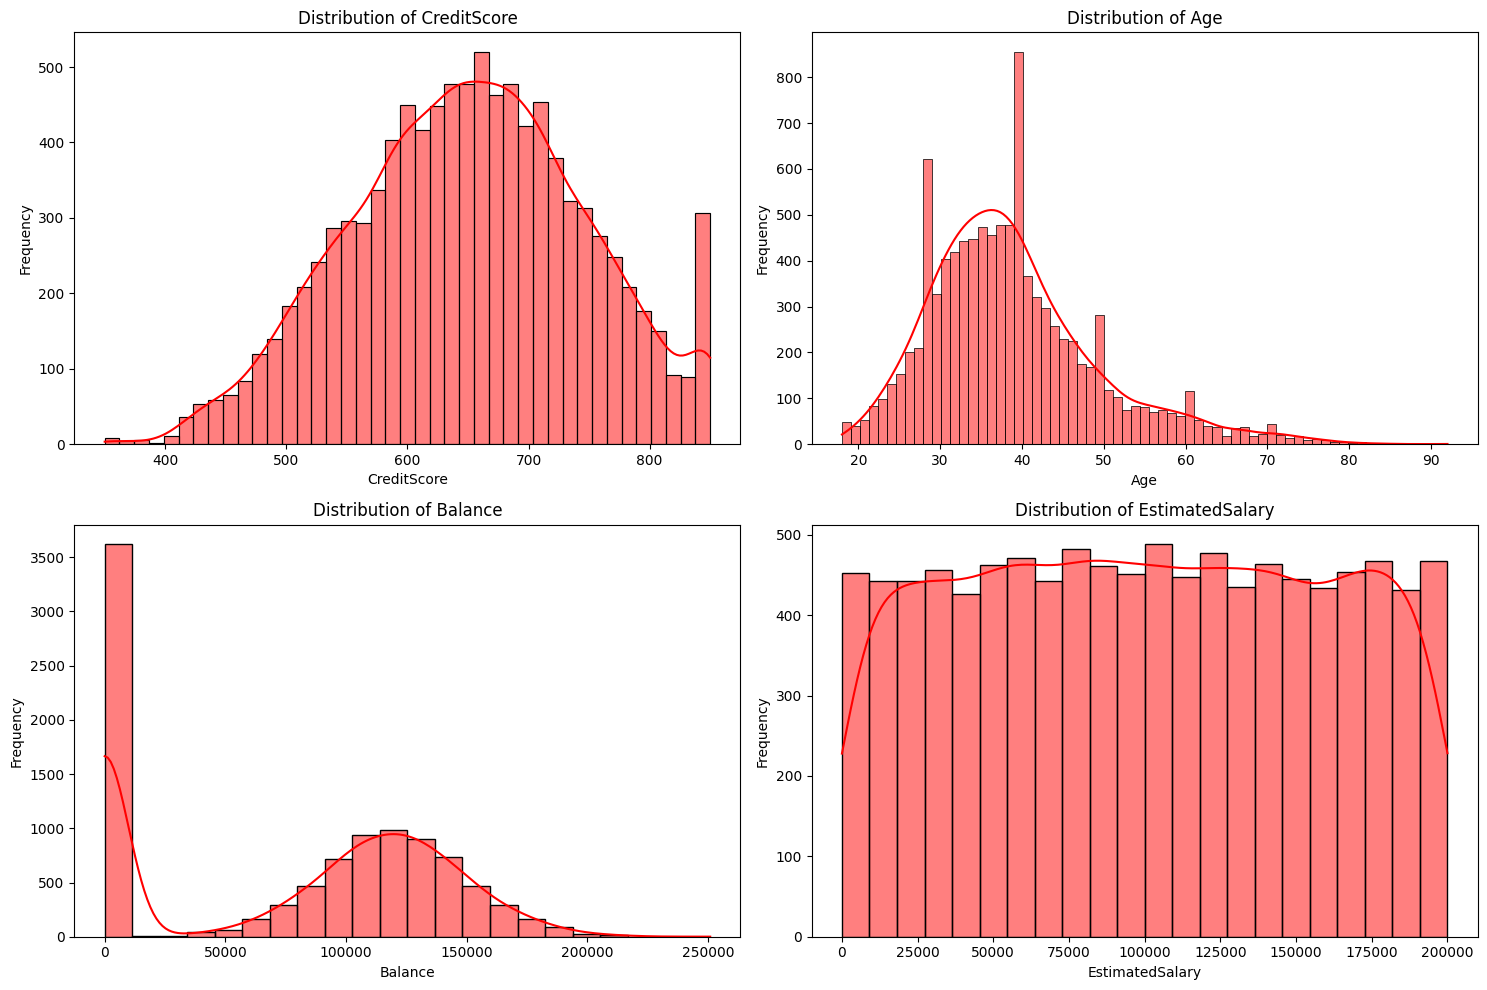

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs = axs.flatten()

for i, col in enumerate(churn_df[['CreditScore','Age','Balance','EstimatedSalary']]):
  sns.histplot(churn_df[col], ax=axs[i], kde = True, color='red')
  axs[i].set_title(f'Distribution of {col}')
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
churn_df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Creating one more columns by using Age column
def age_group(row):
  if row['Age'] <= 50:
    return 'Young'
  else:
    return 'Sinior_Citizen'

churn_df['Age_group'] = churn_df.apply(age_group, axis=1)

In [ ]:
def balance_group(row):
  if row['Balance'] == 0:
    return 'Zero Balance'
  elif row['Balance'] > 0 and row['Balance']>=127644:
    return 'Average Balance'
  else:
    return 'High Balance'

churn_df['balance_group'] = churn_df.apply(balance_group, axis=1)

In [ ]:
def salary_group(row):
  if row['EstimatedSalary'] <= 51002:
    return 'Low_Salary'
  elif row['EstimatedSalary'] > 51002 and row['EstimatedSalary'] <= 149388:
    return 'Average_Salary'
  else:
    return 'High_Salary'

churn_df['salary_group'] = churn_df.apply(salary_group, axis=1)

In [ ]:
churn_df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group,balance_group,salary_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Young,Zero Balance,Average_Salary
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Young,High Balance,Average_Salary
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Young,Average Balance,Average_Salary
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Young,Zero Balance,Average_Salary
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Young,High Balance,Average_Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Young,Zero Balance,Average_Salary
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Young,High Balance,Average_Salary
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Young,Zero Balance,Low_Salary
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Young,High Balance,Average_Salary


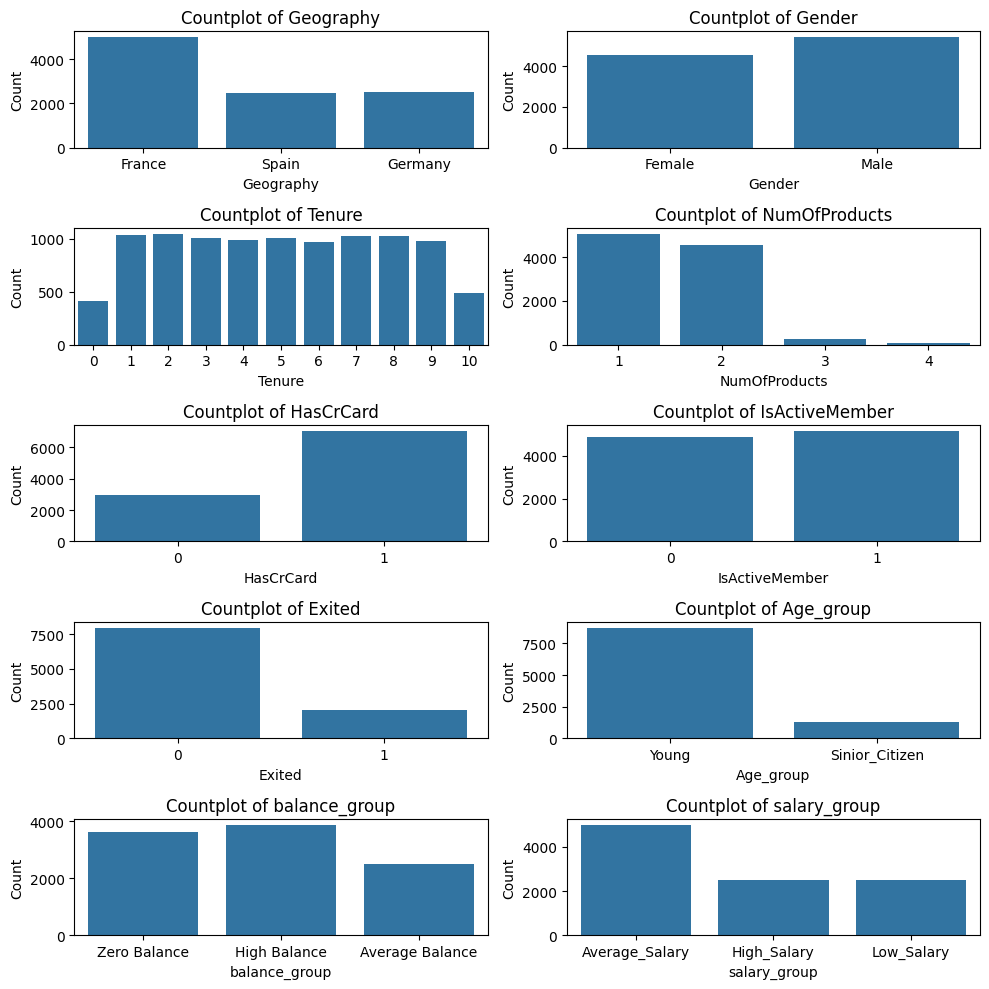

In [ ]:
# Assuming 'churn_df' is your DataFrame
fig, axs = plt.subplots(5,2, figsize=(10,10))
axs = axs.flatten()

# Loop over the columns
for i, col in enumerate(['Geography', 'Gender',  'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited','Age_group', 'balance_group','salary_group']):
    sns.countplot(x=churn_df[col], ax=axs[i])
    axs[i].set_title(f'Countplot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

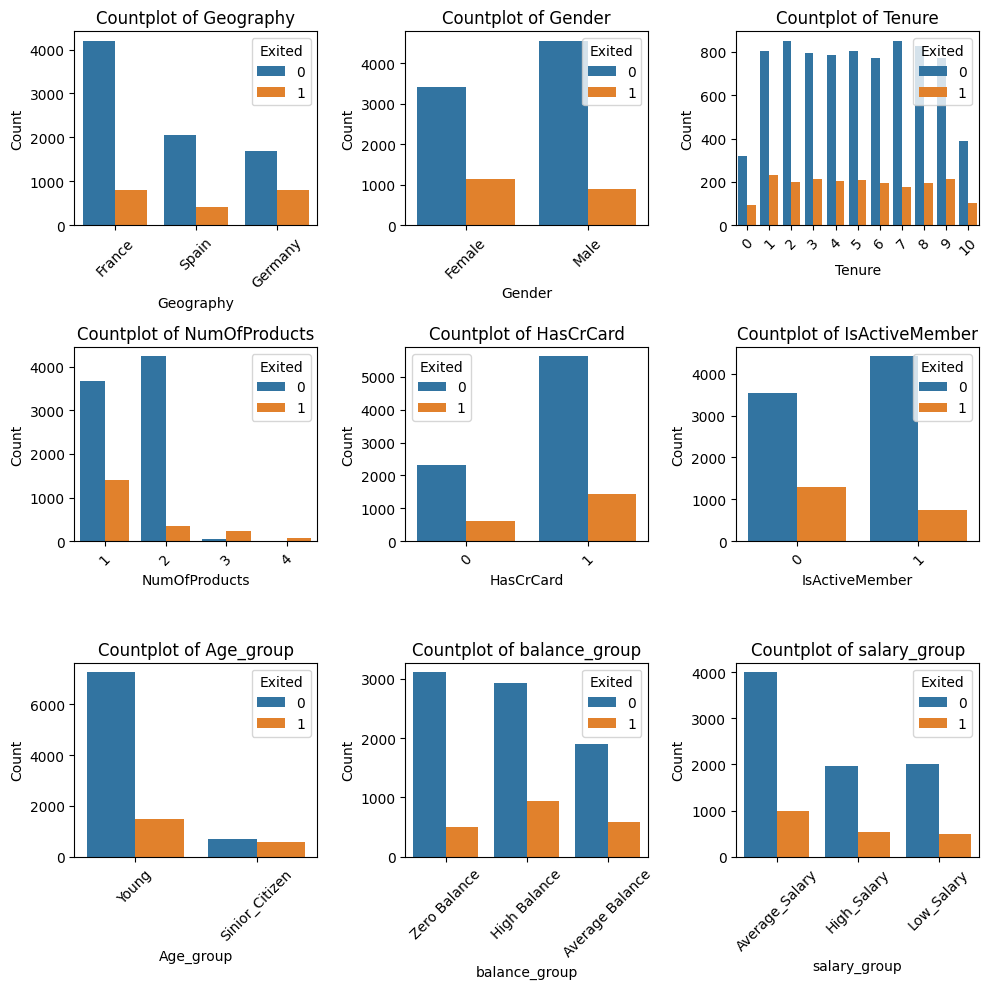

In [ ]:
# Now will see the countplot by using hue parameter as exited
fig, axs = plt.subplots(3,3, figsize=(10,10))
axs = axs.flatten()

# Loop over the columns
for i, col in enumerate(['Geography', 'Gender',  'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','Age_group', 'balance_group','salary_group']):
    sns.countplot(x=churn_df[col], ax=axs[i], hue = churn_df['Exited'])
    axs[i].set_title(f'Countplot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
numerical_df = churn_df.select_dtypes(include=['int64', 'float64'])

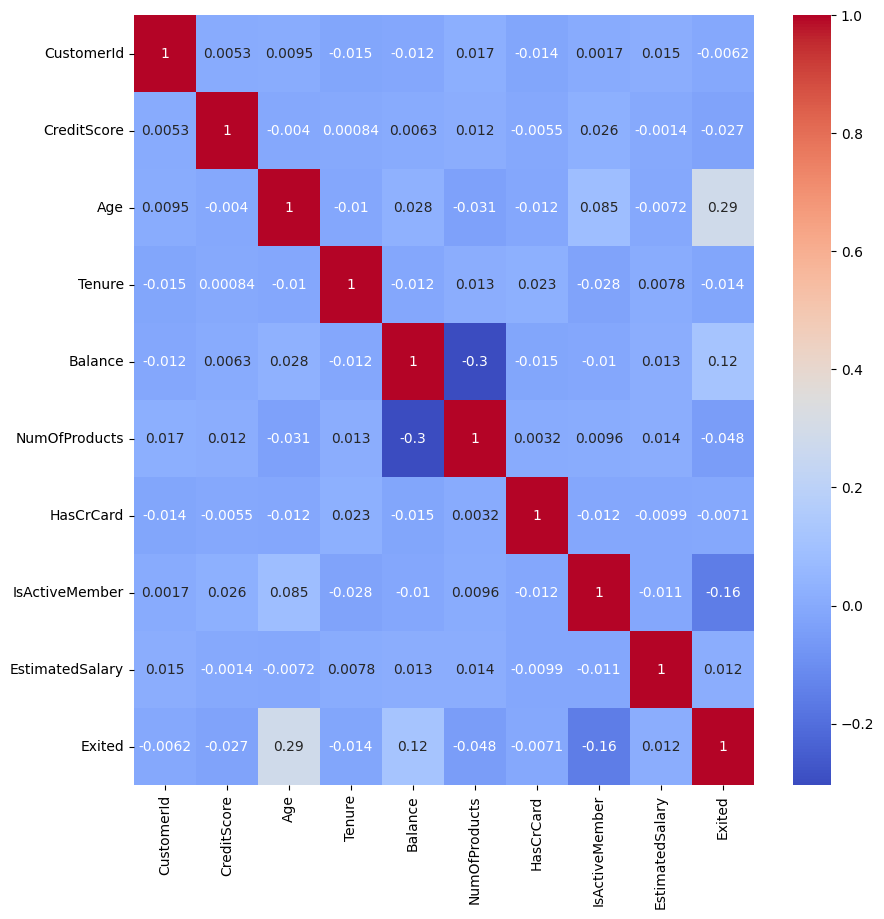

In [ ]:
#plot a heatmap for numerical_df
plt.figure(figsize=(10,10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

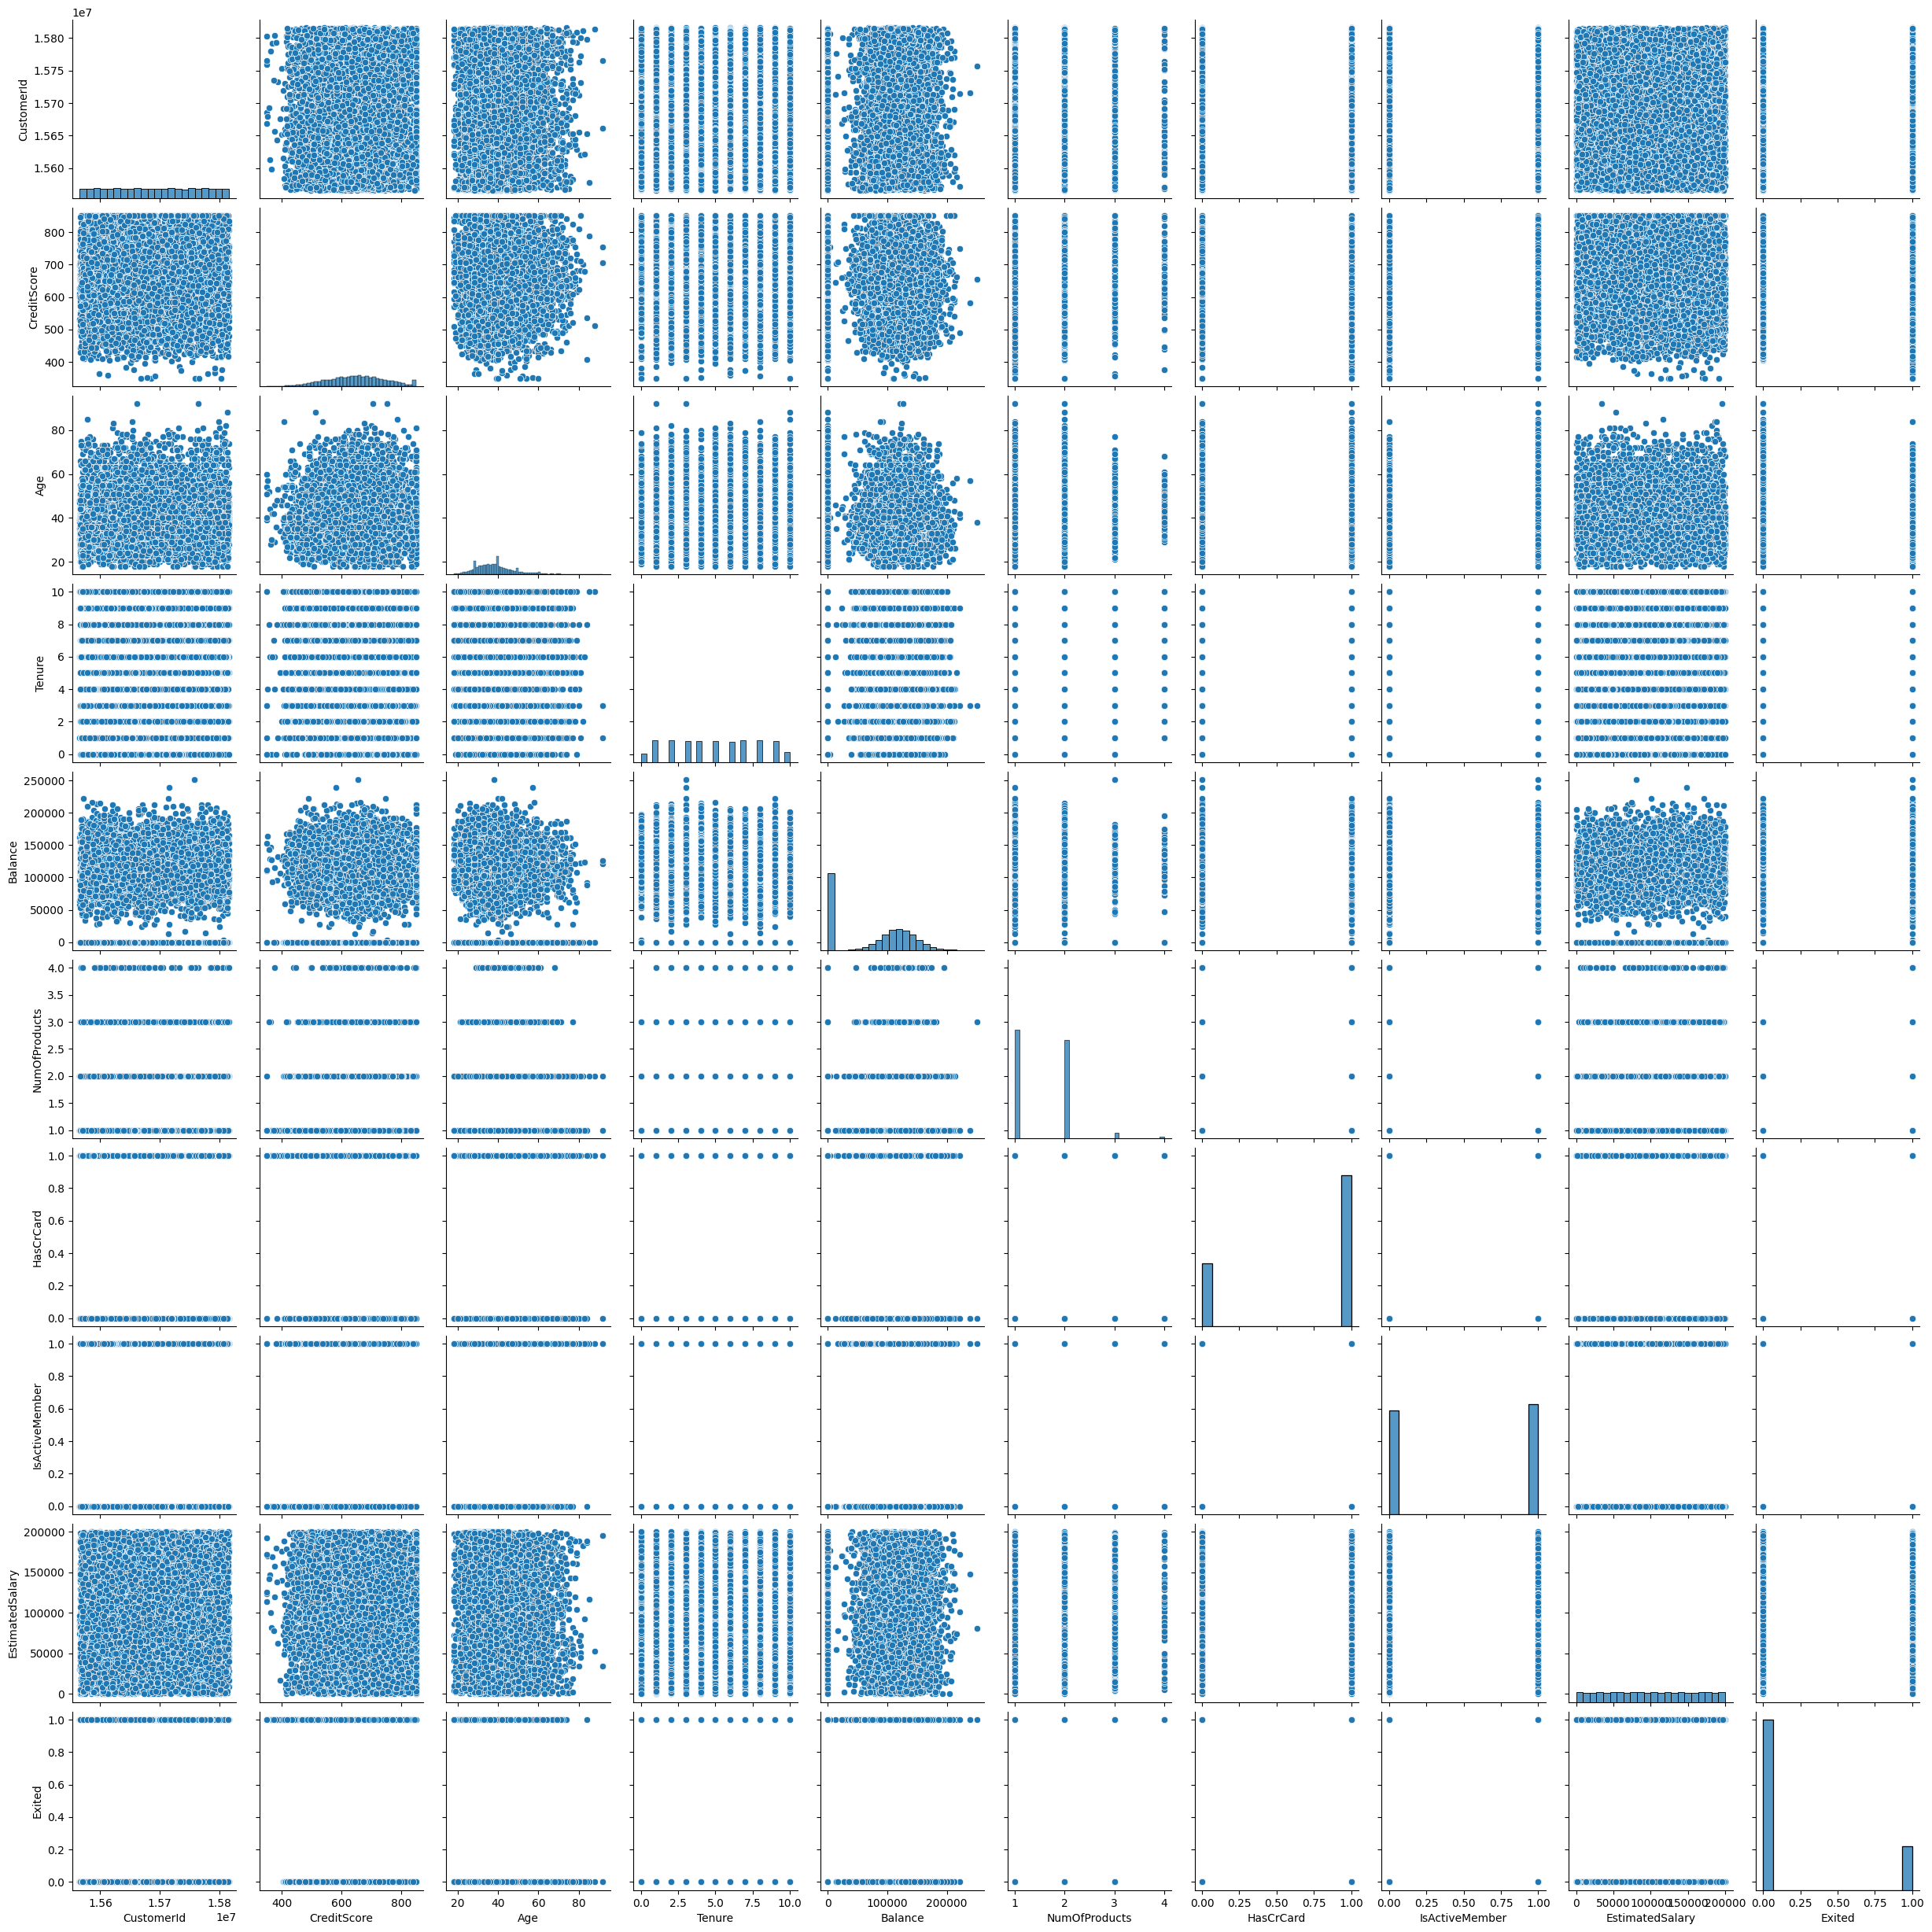

In [ ]:
# Pair plot
sns.pairplot(churn_df)
plt.show()

## **Pre-processing**

In [ ]:
# check null data
churn_df.isnull().sum()

,0
CustomerId,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


In [ ]:
churn_df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Age_group', 'balance_group',
       'salary_group'],
      dtype='object')

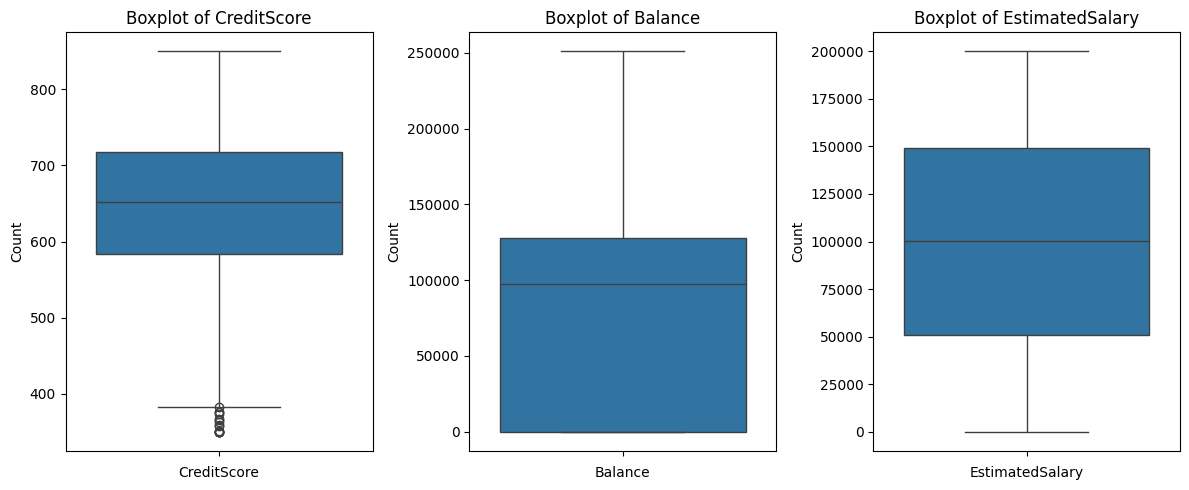

In [ ]:
# Check outliers
fig, axs = plt.subplots(1,3, figsize = (12,5))
axs = axs.flatten()

for i, col in enumerate(churn_df[['CreditScore','Balance', 'EstimatedSalary' ]]):
  sns.boxplot(churn_df[col], ax=axs[i])
  axs[i].set_title(f'Boxplot of {col}')
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Here we can clearly see outliers are only present in CreditScore column

In [ ]:
churn_df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group,balance_group,salary_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Young,Zero Balance,Average_Salary
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Young,High Balance,Average_Salary
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Young,Average Balance,Average_Salary
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Young,Zero Balance,Average_Salary
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Young,High Balance,Average_Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Young,Zero Balance,Average_Salary
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Young,High Balance,Average_Salary
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Young,Zero Balance,Low_Salary
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Young,High Balance,Average_Salary


In [ ]:
# To remove outliers present in CreditScore
Q1 = churn_df['CreditScore'].quantile(0.25)
Q3 = churn_df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

134.0


In [ ]:
lower_bridge = churn_df['CreditScore'].quantile(0.25) - (IQR*1.5)
upper_bridge = churn_df['CreditScore'].quantile(0.75) + (IQR*1.5)

In [ ]:
# Assigning values correctly using .loc
churn_df.loc[churn_df['CreditScore'] < lower_bridge, 'CreditScore'] = lower_bridge
churn_df.loc[churn_df['CreditScore'] > upper_bridge, 'CreditScore'] = upper_bridge

In [ ]:
churn_df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group,balance_group,salary_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Young,Zero Balance,Average_Salary
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Young,High Balance,Average_Salary
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Young,Average Balance,Average_Salary
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Young,Zero Balance,Average_Salary
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Young,High Balance,Average_Salary


In [ ]:
# Encoding of the objective features
churn_df = pd.get_dummies(churn_df, columns=['Geography', 'Gender'],drop_first = True )

In [ ]:
churn_df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group,balance_group,salary_group,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,Young,Zero Balance,Average_Salary,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Young,High Balance,Average_Salary,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,Young,Average Balance,Average_Salary,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,Young,Zero Balance,Average_Salary,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Young,High Balance,Average_Salary,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,Young,Zero Balance,Average_Salary,False,False,True
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,Young,High Balance,Average_Salary,False,False,True
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,Young,Zero Balance,Low_Salary,False,False,False
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,Young,High Balance,Average_Salary,True,False,True


In [ ]:
churn_df_copy = churn_df.drop(columns=['Age_group','balance_group','salary_group','CustomerId'])

In [61]:
churn_df_copy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


## **Define Target Variable (y) and Feature Variables (X)**

In [62]:
X = churn_df_copy.drop(columns=['Exited'])
y = churn_df_copy['Exited']

In [63]:
# Balancing Target Variable
from imblearn.combine import SMOTETomek
from collections import Counter

In [64]:
# Initialize SMOTETomek with the desired sampling strategy
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Check the class distribution after resampling
print(f"Class distribution before resampling: {Counter(y)}")
print(f"Class distribution after resampling: {Counter(y_resampled)}")

Class distribution before resampling: Counter({0: 7963, 1: 2037})
Class distribution after resampling: Counter({1: 6892, 0: 6892})


## **Train Test Split**

In [65]:
# Splitting original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Splitting resampled dataset
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [67]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [68]:
# Standardizing the original dataset
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [69]:
# Standardize the resampled data
X_train_resampled = sc.fit_transform(X_train_resampled)
X_test_resampled = sc.transform(X_test_resampled)

## **Modelling for original dataset**

In [70]:
# Fitting the original dataset
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [71]:
y_pred = svc.predict(X_test)

In [72]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

## **Model Evaluation**

In [73]:
# Testing evaluation
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.857
[[1563   44]
 [ 242  151]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [74]:
# Training Evaluation
X_pred = svc.predict(X_train)
print(accuracy_score(y_train, X_pred))
print(confusion_matrix(y_train, X_pred))
print(classification_report(y_train, X_pred))

0.865125
[[6240  116]
 [ 963  681]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6356
           1       0.85      0.41      0.56      1644

    accuracy                           0.87      8000
   macro avg       0.86      0.70      0.74      8000
weighted avg       0.86      0.87      0.85      8000



In [ ]:
# Hyperparamter tunning
# Define the hyperparameter grid (narrowed down)
param_dist = {
    'C': [0.1, 1, 10, 100],           # Fewer values for C
    'gamma': ['scale', 'auto', 0.01, 0.1], # Reduced gamma values
    'kernel': ['linear', 'rbf', 'poly'],  # Limited kernel types
    'degree': [2, 3]                  # Reduced polynomial degrees
}

# Initialize the estimator
svc = SVC()

# Initialize RandomizedSearchCV with reduced n_iter and cv
random = RandomizedSearchCV(estimator=svc,
    param_distributions=param_dist,
    n_iter=20,                 # Reduced number of parameter settings sampled
    scoring='accuracy',        # Metric to optimize
    cv=3,                      # Reduced number of cross-validation folds
    verbose=1,                 # Display progress
    random_state=42,           # For reproducibility
    n_jobs=-1 )                # Use all available cores

# Fit the RandomizedSearchCV to the training data
random.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters found: ", random.best_params_)

# Display the best score
print("Best cross-validation accuracy: {:.2f}".format(random.best_score_))

# Predict on the test set
y_pred = random.best_estimator_.predict(X_test)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:  {'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 100}
Best cross-validation accuracy: 0.86
[[1568   39]
 [ 250  143]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.79      0.36      0.50       393

    accuracy                           0.86      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.85      0.86      0.83      2000



## **Modelling for resampled dataset**

In [86]:
svc = SVC()
svc.fit(X_train_resampled, y_train_resampled)

SVC()

In [76]:
y_resampled_pred = svc.predict(X_test_resampled)

## **Model Evaluation**

In [77]:
# Testing evaluation
print(accuracy_score(y_test_resampled, y_resampled_pred))
print(confusion_matrix(y_test_resampled, y_resampled_pred))
print(classification_report(y_test_resampled, y_resampled_pred))

0.833151976786362
[[1171  214]
 [ 246 1126]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1385
           1       0.84      0.82      0.83      1372

    accuracy                           0.83      2757
   macro avg       0.83      0.83      0.83      2757
weighted avg       0.83      0.83      0.83      2757



In [78]:
# Training evaluation
X_resampled_pred = svc.predict(X_train_resampled)
print(accuracy_score(y_train_resampled, X_resampled_pred))
print(confusion_matrix(y_train_resampled, X_resampled_pred))
print(classification_report(y_train_resampled, X_resampled_pred))

0.8483721773827877
[[4761  746]
 [ 926 4594]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      5507
           1       0.86      0.83      0.85      5520

    accuracy                           0.85     11027
   macro avg       0.85      0.85      0.85     11027
weighted avg       0.85      0.85      0.85     11027



In [79]:
# Hyper parameter tunning
# Define the hyperparameter grid (narrowed down)
param_dist = {
    'C': [0.1, 1, 10, 100],           # Fewer values for C
    'gamma': ['scale', 'auto', 0.01, 0.1], # Reduced gamma values
    'kernel': ['linear', 'rbf', 'poly'],  # Limited kernel types
    'degree': [2, 3]                  # Reduced polynomial degrees
}

# Initialize the estimator
svc = SVC()

# Initialize RandomizedSearchCV with reduced n_iter and cv
random = RandomizedSearchCV(estimator=svc,
    param_distributions=param_dist,
    n_iter=20,                 # Reduced number of parameter settings sampled
    scoring='accuracy',        # Metric to optimize
    cv=3,                      # Reduced number of cross-validation folds
    verbose=1,                 # Display progress
    random_state=42,           # For reproducibility
    n_jobs=-1 )                # Use all available cores

# Fit the RandomizedSearchCV to the training data
random.fit(X_train_resampled, y_train_resampled)

# Display the best parameters
print("Best Parameters found: ", random.best_params_)

# Display the best score
print("Best cross-validation accuracy: {:.2f}".format(random.best_score_))

# Predict on the test set
y_pred = random.best_estimator_.predict(X_test_resampled)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test_resampled, y_pred))
print(classification_report(y_test_resampled, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 10}
Best cross-validation accuracy: 0.83
[[1165  220]
 [ 219 1153]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1385
           1       0.84      0.84      0.84      1372

    accuracy                           0.84      2757
   macro avg       0.84      0.84      0.84      2757
weighted avg       0.84      0.84      0.84      2757



## **Prediction**

steps to follow
1. Extract a random row using sample function
2. Separate X and y
3. Standardize X
4. Predict

In [95]:
prediction_sample = churn_df_copy.sample(10)

In [96]:
prediction_sample

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2698,586,28,5,0.00,3,1,0,170487.40,1,False,False,False
9218,676,48,2,124442.38,1,1,0,15068.53,1,True,False,False
6258,712,27,2,133009.51,1,1,0,126809.15,0,False,False,False
7825,594,23,4,104753.84,2,1,0,56756.52,1,True,False,False
2473,383,57,4,163146.46,1,1,0,169621.69,1,True,False,False
1434,552,41,9,124349.34,1,1,0,135635.25,0,False,False,False
2484,850,39,6,96863.13,1,1,1,121681.19,0,False,False,True
1166,622,28,1,143124.63,2,1,0,81723.80,0,True,False,False
8559,677,39,0,111213.64,2,1,1,147578.26,0,True,False,False
9128,693,43,1,121927.92,1,1,0,87994.95,1,True,False,False


In [97]:
# Separating X and y
X = prediction_sample.drop(columns=['Exited'])
y = prediction_sample['Exited']

In [98]:
# Standardize
X = sc.fit_transform(X)

In [99]:
y_pred = svc.predict(X)

In [100]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [102]:
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

0.8
[[5 0]
 [2 3]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

